<a href="https://colab.research.google.com/github/plusbeauxjours/AnimationBook/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 18.7 MB/s 


In [2]:
import pyupbit

In [3]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2022-01-23 15:00:00,43712000.0,43800000.0,43300000.0,43362000.0,165.126749,7.182442e+09
2022-01-23 16:00:00,43388000.0,43934000.0,43362000.0,43730000.0,258.963385,1.131870e+10
2022-01-23 17:00:00,43724000.0,44080000.0,43570000.0,43982000.0,268.278677,1.176372e+10
2022-01-23 18:00:00,43982000.0,44300000.0,43931000.0,44018000.0,759.623682,3.354730e+10
2022-01-23 19:00:00,44018000.0,44109000.0,43730000.0,44056000.0,207.907828,9.136267e+09
...,...,...,...,...,...,...
2022-01-31 18:00:00,46080000.0,46294000.0,46050000.0,46200000.0,62.621193,2.891074e+09
2022-01-31 19:00:00,46200000.0,46255000.0,46056000.0,46230000.0,95.981234,4.427983e+09
2022-01-31 20:00:00,46230000.0,46287000.0,45756000.0,46207000.0,138.685435,6.381982e+09
2022-01-31 21:00:00,46207000.0,46286000.0,45809000.0,46014000.0,122.844797,5.652821e+09


In [4]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-01-23 15:00:00,43362000.0
1,2022-01-23 16:00:00,43730000.0
2,2022-01-23 17:00:00,43982000.0
3,2022-01-23 18:00:00,44018000.0
4,2022-01-23 19:00:00,44056000.0
...,...,...
195,2022-01-31 18:00:00,46200000.0
196,2022-01-31 19:00:00,46230000.0
197,2022-01-31 20:00:00,46207000.0
198,2022-01-31 21:00:00,46014000.0


In [5]:
#prophet 불러옴
from fbprophet import Prophet

In [6]:
#학습
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [7]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

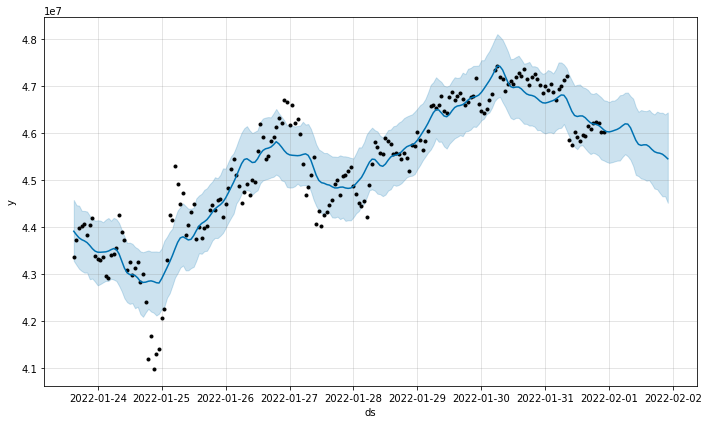

In [8]:
#그래프1
fig1 = model.plot(forecast)

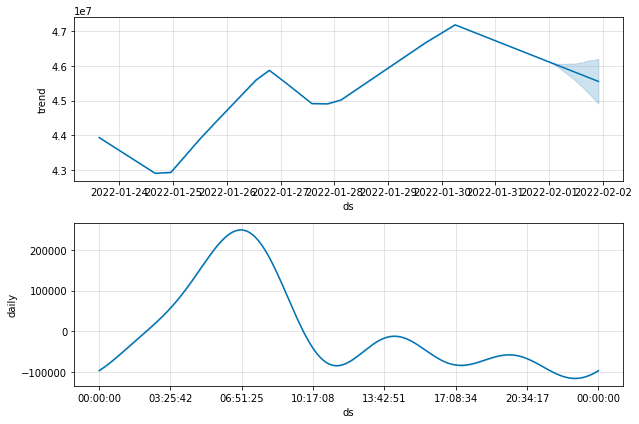

In [9]:
#그래프2
fig2 = model.plot_components(forecast)

In [11]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

46211000.0

In [12]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

45978075.780838385

In [13]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  46211000.0
종가의 가격:  45978075.780838385


In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-23 15:00:00,4.393129e+07,4.327731e+07,4.457214e+07,4.393129e+07,4.393129e+07,-24036.842710,-24036.842710,-24036.842710,-24036.842710,-24036.842710,-24036.842710,0.0,0.0,0.0,4.390725e+07
1,2022-01-23 16:00:00,4.388992e+07,4.318979e+07,4.446148e+07,4.388992e+07,4.388992e+07,-57630.029445,-57630.029445,-57630.029445,-57630.029445,-57630.029445,-57630.029445,0.0,0.0,0.0,4.383229e+07
2,2022-01-23 17:00:00,4.384855e+07,4.310759e+07,4.445092e+07,4.384855e+07,4.384855e+07,-81800.108783,-81800.108783,-81800.108783,-81800.108783,-81800.108783,-81800.108783,0.0,0.0,0.0,4.376675e+07
3,2022-01-23 18:00:00,4.380717e+07,4.306052e+07,4.434073e+07,4.380717e+07,4.380717e+07,-79639.872503,-79639.872503,-79639.872503,-79639.872503,-79639.872503,-79639.872503,0.0,0.0,0.0,4.372753e+07
4,2022-01-23 19:00:00,4.376580e+07,4.302747e+07,4.434044e+07,4.376580e+07,4.376580e+07,-63527.722857,-63527.722857,-63527.722857,-63527.722857,-63527.722857,-63527.722857,0.0,0.0,0.0,4.370227e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-02-01 18:00:00,4.565626e+07,4.480045e+07,4.645148e+07,4.518733e+07,4.616488e+07,-79639.872501,-79639.872501,-79639.872501,-79639.872501,-79639.872501,-79639.872501,0.0,0.0,0.0,4.557662e+07
220,2022-02-01 19:00:00,4.563067e+07,4.472174e+07,4.642711e+07,4.511291e+07,4.617060e+07,-63527.722858,-63527.722858,-63527.722858,-63527.722858,-63527.722858,-63527.722858,0.0,0.0,0.0,4.556714e+07
221,2022-02-01 20:00:00,4.560508e+07,4.465001e+07,4.642909e+07,4.505447e+07,4.617285e+07,-59201.125935,-59201.125935,-59201.125935,-59201.125935,-59201.125935,-59201.125935,0.0,0.0,0.0,4.554588e+07
222,2022-02-01 21:00:00,4.557948e+07,4.465173e+07,4.639210e+07,4.497561e+07,4.619704e+07,-77975.505867,-77975.505867,-77975.505867,-77975.505867,-77975.505867,-77975.505867,0.0,0.0,0.0,4.550151e+07
